# Explore `Station` Data

In [2]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [9]:
% matplotlib inline

# select ggplot stype
plt.style.use("ggplot")

In [10]:
# read data into a pandas dataframe
df_station = pd.read_csv("../data/station.csv", parse_dates=["installation_date"])


In [11]:
city_map = folium.Map(location=[df_station.lat.mean(), df_station.long.mean()])
city_map

### Plot the number of stations per city 

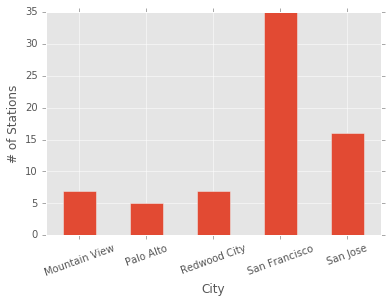

In [12]:
# aggregate the data by city and count the elements
dfn = df_station.groupby(by='city', as_index=False).count()

# plot the data
fig, ax = plt.subplots()
dfn.plot(ax=ax, x=['city'], y=['id'], kind="bar")

# set x, y labels
ax.set(xlabel="City", ylabel="# of Stations")

# rotate the x-axis tick labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)

# hide the lagends
ax.legend().set_visible(False)

plt.show()

The plot shows the distribution of stations among the different cites in the Bay area. We can see that San Francisco has much largest number of stations than the other cities.     

### Plot the number of docks per city

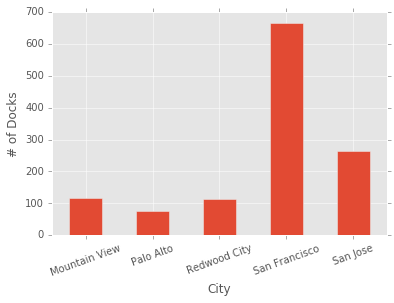

In [13]:
# aggregate the data by city and sum them
dfn = df_station.groupby(by='city', as_index=False).sum()

# plot the data
fig, ax = plt.subplots()
dfn.plot(ax=ax, x=['city'], y=['dock_count'], kind="bar")

# set x, y labels
ax.set(xlabel="City", ylabel="# of Docks")

# rotate the x-axis tick labels
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=20)

# hide the lagends
ax.legend().set_visible(False)

plt.show()


This plot shows the number of docks versus cites. It has a similar distribution as the previous plot.